In [1]:

"""
@author: AllanBurr
IMPORT LIBRARIES"""
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [37]:
def printFigs(df):
    plot = df.plot('Date', 'Total',  kind = 'line',marker = 'o', title ='Total Spending', legend = False)
    fig = plot.get_figure()
    fig.savefig("figures/TotalSpendingByDate.png")
    
    
    plot = df.plot('Date', 'Groceries', kind = 'line',marker = 'o',title ='Grocery Expenses', legend = False)
    fig = plot.get_figure()
    fig.savefig("figures/GroceriesSpending.png")

    plot = df.plot('Date', 'Transport',color='orange', kind = 'line', title ='transport Expenses', legend = False,marker = 'o')
    fig = plot.get_figure()
    fig.savefig("figures/Transport.png")

    plot = df.plot('Date', 'Take_Out', kind = 'line', color='green', title ='Take Out Expenses', legend = False,marker = 'o')
    fig = plot.get_figure()
    fig.savefig("figures/Take_out.png")

    plot = df.plot('Date', 'Medical', kind = 'line', color='red',title ='Medical Expenses', legend = False,marker = 'o')
    fig = plot.get_figure()
    fig.savefig("figures/Medical.png")


    plot = df.plot('Date', 'Entertainment', kind = 'line', color='yellow',title ='Entertainment Expenses', legend = False)
    fig = plot.get_figure()
    fig.savefig("figures/Entertainment.png")

    plot = df.plot('Date', 'Other', kind = 'line', color='black',title ='Misc. Expenses', legend = False,)
    fig = plot.get_figure()
    fig.savefig("figures/Other.png")

In [3]:
def goThru(df):
    a = list(df)
    totals = 0
    stringText = ""
    for totals in a[1:9]:        
        stringText +=getInfo(df,totals)
    return stringText 

In [4]:
def getInfo(df, colName):
    #To get information from dataframe
    stri = "Begin"
    sum = df[colName].sum()
    mean = df[colName].mean()
    median = df[colName].median()
    maximum= df[colName].max()
    sum = round(sum, 2)
    mean = round(mean, 2)
    median = round(median, 2)
    stri = str("Total amount spent in the period on "  + colName+ ": $" + str(sum))
    stri2 = str("Average amount spent per day on "  + colName+ ": $" + str(mean))
    stri3 = str("Most spent in a single day on "  + colName+ ": $"+ str(maximum))   
    stri += "\n"
    stri += (stri2)
    stri += "\n"
    stri += stri3
    stri += "\n"
    stri += "\n"
    stri += "\n"
    #print(stri)
    return stri

In [21]:
def printOnce(df):
    aa = df.max()
    maximum= df['Total'].max()
    minimum = df['Total'].min()
    cumulativeMax = df.cummax()
    standardDev = df['Total'].std(axis = 0)
    standardDev = round(standardDev, 2)
    mostSpentInADay = aa['Date']
    print(str(maximum) + " on " + str(mostSpentInADay))
    #aa = df[' Total '].min()
    minDate = df.min()
    leastInADay = minDate['Date']
    print("Least spent in a single day: ")
    print(str(minimum) + " on " + str(leastInADay))
    print("Total amount of days with no expenses: ")
    print("Standard deviation of total spending = " + str(standardDev))

In [5]:
def getTotalDays(df):
   # numberOfDays = len(df.index)
    a = df['Date'].nunique()
    return a

def getTotalEntries(df):
    numberOfEntries = len(df.index)
    return numberOfEntries

In [6]:
def countValuesInColumn(colName, days):
    var = 0
    text = ""
    for x in df[colName]:
        if x != 0:
            var += 1
    stringCol = str(var)
    text += ("There were " + stringCol + " instances of " + colName)
    text += '\n'
    percent = (var/days)*100
    percent = round(percent, 2)
    text += ("You had a " + str(percent) + "% chance of purchasing " + colName + " per day")
    text += '\n'
    return text

In [7]:
def WriteToFile(df):
    file1 = open("Statistical Results.txt","w") 
    firstDay = df['Date'].head(1)
    firstDay = firstDay[0]
    lastDay =df['Date'].iloc[-1]
    #lastDay = lastDay[0]


    fileText = "From " + str(firstDay) + " until " + str(lastDay)+ "\n"
    fileText += "there were " + str(getTotalDays(df)) + " days which purchases were made\n"
    fileText += goThru(df)
    file1.write(fileText)
    file1.close() 


In [8]:
def createSeabornGraph():
    fig, ax = plt.subplots(figsize = (12,6))    
    fig = sns.barplot(x = 'Date', y = 'Total', data = df)
    ax.set_ylabel('Total Spent')
    ax.set_xlabel('Date')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

    pic = fig.get_figure()
    pic.savefig("figures/SeabornTotalByDate.png")

In [9]:
def iterateThruByColumn(df):
    days = getTotalDays(df)
    text = "In a total of " + str(days)+ " days\n"
    a = list(df)
    totals = 0
    for totals in a[1:8]:
        text += countValuesInColumn(totals, days)
        text += '\n'
    return text

In [10]:
def graphsWithoutBills(df):
    del df['Bills']
    plot = df.plot(x='Date', y=['Groceries', 'Transport', 'Take_Out', 'Medical', 'Entertainment', 'Other'], kind="bar", stacked=True)
    fig = plot.get_figure()
    fig.savefig("figures/Without_Total.png")
    del df['Total'] 
    plot = df.plot(x='Date', y=['Groceries', 'Transport', 'Take_Out', 'Medical', 'Entertainment', 'Other'], kind="line")
    fig = plot.get_figure()
    fig.savefig("figures/WithoutBills_Rent.png")

In [11]:
def writeProbabilityToFile(df):
    file1 = open("ProbabilityByCategory.txt","w") 
    fileText = iterateThruByColumn(df)
    file1.write(fileText)
    file1.close() 

In [12]:
import datetime
import calendar
import random


In [31]:
#def createMockData():
 #   dateValues = 'Date'
 #   total = 'Total'
 #   entries = 100
 #   date_rng = pd.date_range(start='1/1/2020', end='1/06/2020', freq='D'
#   columnNames = ['Date','Groceries','Bills','Transport','Take_Out','Medical','Entertainment','Other']
   # df = pd.DataFrame(columns = [columnNames])
  #  for i in range(entries):
 #       date = [pd.date_range(start='1/1/2020', periods=entries, freq='D')]
  #      x = [random.randint(1, 50) for a in columnNames]
  #      row = date + x
  #      df.loc[i] = row
 #   df.to_csv('test_data.csv')  
    
    
    

In [15]:
#createMockData()

In [16]:
def generate_random_time(month):
  day = generate_random_day(month)
  if random.random() < 0.5:
    date = datetime.datetime(2020, month, day,12,00)
  else:
    date = datetime.datetime(2020, month, day,20,00)
  time_offset = numpy.random.normal(loc=0.0, scale=180)
  final_date = date + datetime.timedelta(minutes=time_offset)
  return final_date.strftime("%m/%d/%y %H:%M")

def generate_random_day(month):
  day_range = calendar.monthrange(2020,month)[1]
  return random.randint(1,day_range)

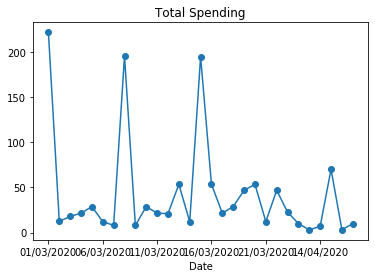

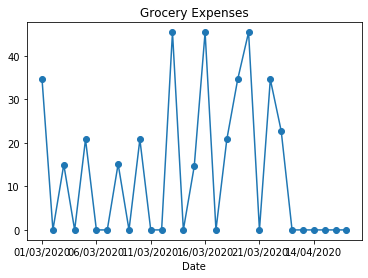

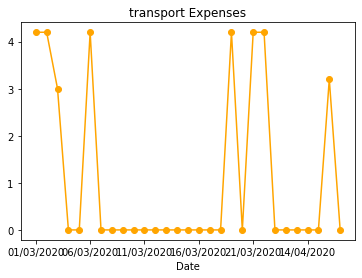

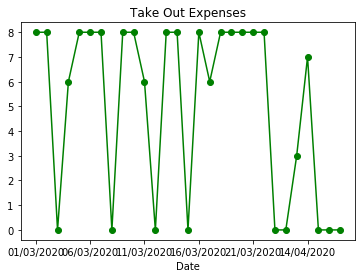

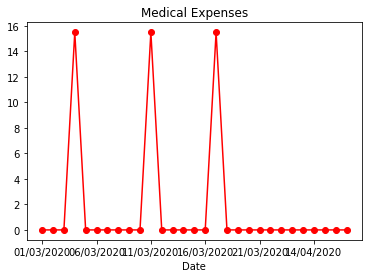

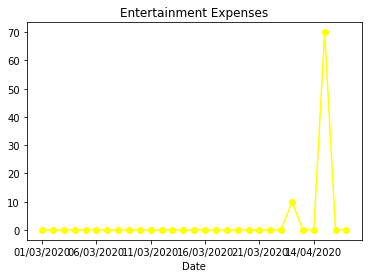

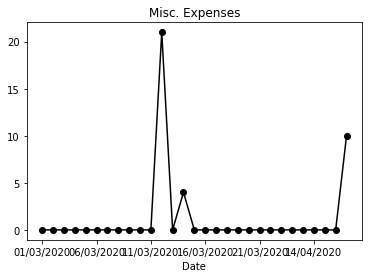

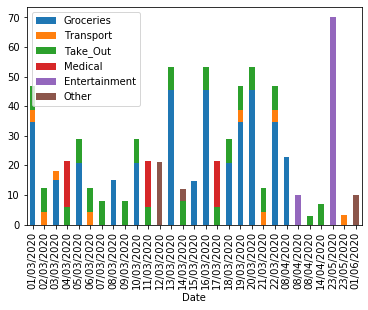

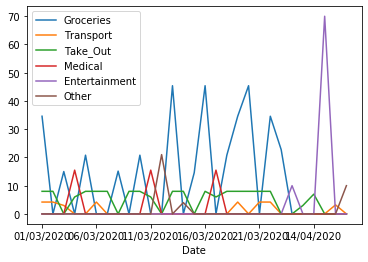

In [43]:
####BEGIN PROGRAM####
if __name__=="__main__": 
    df = pd.read_csv('outputData.csv')
    printFigs(df)
    WriteToFile(df)
    writeProbabilityToFile(df)
    graphsWithoutBills(df)
    #createSeabornGraph()

In [38]:
noZeros = [float('nan') if x==0 else x for x in df['Groceries']]

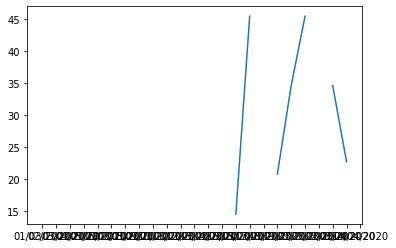